In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## ClusterSynthesis

In [11]:
pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([[-1, 3], [1, 5], [3,7]])
sigma_true = np.zeros((3, 2, 2))
sigma_true[0] = np.array([[0.9, 0.1], [0.1, 0.9]])/3
sigma_true[1] = np.array([[0.6, 0.4], [0.4, 0.6]])/3
sigma_true[2] = np.array([[0.7, 0.3], [0.3, 0.7]])/3
col = ['red', 'green', 'blue', 'black', 'cyan']

In [12]:
N = 100
v = np.zeros((len(pi_true), N, 2))
C = np.zeros(len(pi_true), dtype = 'int64')
obs = np.zeros((N, 2))

In [13]:
for i in range(N):
    z = np.random.random()
    idx = 0
    needle = 0
    
    for j in range(len(pi_true)):
        if z >= needle and z <= needle + pi_true[j]:
            idx = j
            break
        else:
            needle += pi_true[j]
            
    obs[i] = np.random.multivariate_normal(mu_true[idx], sigma_true[idx])
    C[idx] += 1
    v[idx, C[idx]] = obs[i]

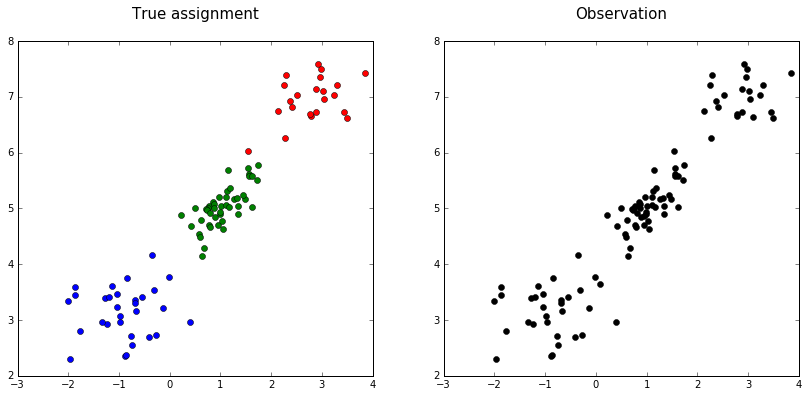

In [14]:
plt.figure(1, figsize=(14, 6), dpi=100)
plt.subplot(121)
plt.title('True assignment\n', fontsize=15)
for i in range(len(pi_true)):
    plt.plot(v[i, 1:C[i], 0], v[i, 1:C[i], 1], 'o')
    
plt.subplot(122)
plt.title('Observation\n', fontsize=15)
plt.plot(obs[:, 0], obs[:, 1], 'ko')

plt.show()

## ClusterSynthesis2

In [7]:
pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([[0, 0], [0, 0], [0, 0]])
sigma_true = np.zeros((3, 2, 2))
radius = np.array([1, 3, 5])
col = ['r', 'g', 'b', 'k', 'c']

In [8]:
N = 1000
v = np.zeros((len(pi_true), N, 2))
C = np.zeros(len(pi_true), dtype = 'int64')
obs = np.zeros((N, 2))

In [9]:
for i in range(N):
    z = np.random.random()
    idx = 0
    needle = 0
    
    for j in range(len(pi_true)):
        if z >= needle and z <= needle + pi_true[j]:
            idx = j
            break
        else:
            needle += pi_true[j]
            
    angle = 2 * np.pi * np.random.random()
    r = np.random.random() + radius[idx]
    x = r * np.cos(angle)
    y = r * np.sin(angle)
    C[idx] += 1
    obs[i] = [x, y]
    v[idx, C[idx]] = [x, y]

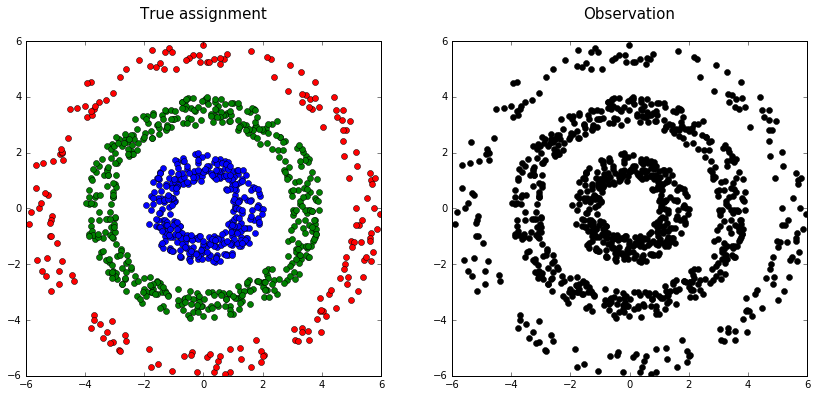

In [10]:
plt.figure(1, figsize=(14, 6), dpi=100)
plt.subplot(121)
plt.title('True assignment\n', fontsize=15)
for i in range(len(pi_true)):
    plt.plot(v[i, 1:C[i], 0], v[i, 1:C[i], 1], 'o')
    
plt.subplot(122)
plt.title('Observation\n', fontsize=15)
plt.plot(obs[:, 0], obs[:, 1], 'ko')

plt.show()

## Kmeans

In [15]:
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [16]:
k = 5
itrEM = 100
showVisualization = [2, 3, 4, 5, 6, 10, 20]

In [17]:
centroid = np.zeros((itrEM, k, 2))
sumDistance = np.zeros(itrEM-1)
assignment = np.zeros(N, dtype = 'int64')

In [18]:
for i in range(k):
    centroid[0, i, :] = obs[i, :]

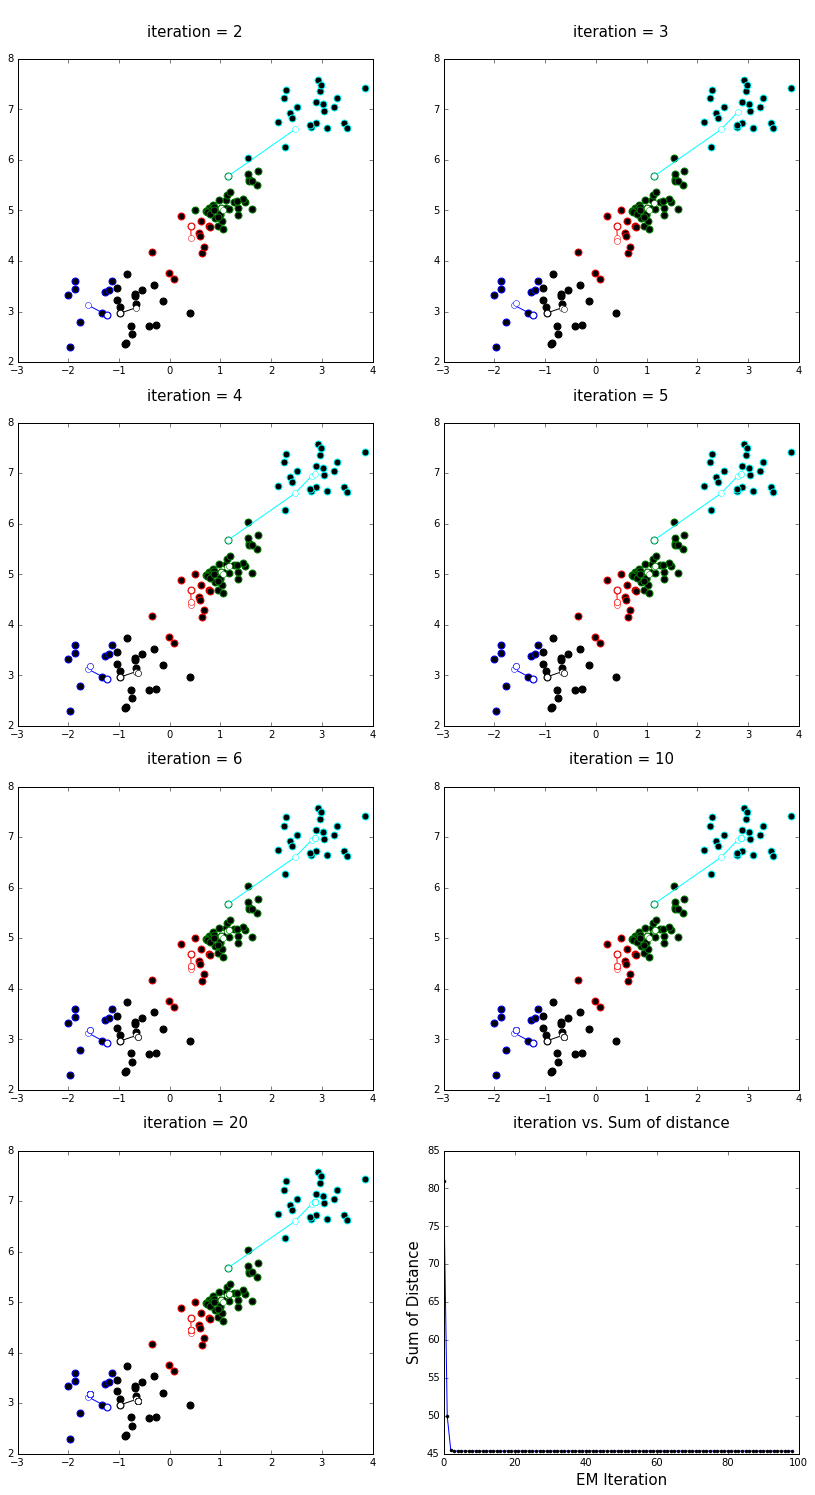

In [19]:
plt.figure(1, figsize=(14, 25), dpi=100)
plotN = 1
for i in range(1, itrEM):       
    for j in range(N):
        idxK = 0
        minDist = distance(centroid[i-1, 0, :], obs[j, :])
        
        for l in range(1, k):
            dist = distance(centroid[i-1, l, :], obs[j, :])
            
            if minDist > dist:
                minDist = dist
                idxK = l
        assignment[j] = idxK
        sumDistance[i-1] += distance(centroid[i-1, idxK, :], obs[j, :])
    
    cntGroups = np.zeros(k) + 1e-5
    
    for j in range(N):        
        cntGroups[assignment[j]] += 1        
        centroid[i, assignment[j]] += obs[j]
    
    for j in range(k):
        centroid[i, j] /= cntGroups[j]
    
    if i in showVisualization:
        plt.subplot(4, 2, plotN)
        plt.title(' \niteration = %s\n'%(i), fontsize = 15)
        plotN += 1
        
        for j in range(k):
            plt.plot(centroid[0:i, j, 0], centroid[0:i, j, 1], color = col[j])
        
            points = np.zeros((int(cntGroups[j]), 2))
            cntTemp = 0
            
            for l in range(N):
                if assignment[l] == j:
                    points[cntTemp] = obs[l]
                    cntTemp += 1
            
            plt.plot(points[:, 0], points[:, 1], 'ko', markeredgecolor = col[j], markersize = 7, markeredgewidth = 1)
            plt.plot(centroid[0:i, j, 0], centroid[0:i, j, 1], 'wo', markeredgecolor = col[j])
            
plt.subplot(4, 2, 8)
plt.title('iteration vs. Sum of distance\n', fontsize=15)
plt.xlabel('EM Iteration', fontsize = 15)
plt.ylabel('Sum of Distance', fontsize = 15)
plt.plot(sumDistance[:])
plt.plot(sumDistance[:], 'ko', markersize = 3)

plt.show()

## Gaussian Mixture Model

In [20]:
k = 3
itrEM = 100
showVisualization = [1, 2, 4, 8, 16, 32, 99]

In [21]:
mu = np.zeros((itrEM, k, 2))
sigma = np.zeros((itrEM, k, 2, 2))
pi = np.zeros((itrEM, k))
likelihood = np.zeros(itrEM-1)
assignment = np.zeros((N, k))

In [22]:
for i in range(k):
    mu[0, i] = obs[i]
    sigma[0, i] = np.eye(2)
    pi[0, i] = 1.0 / k

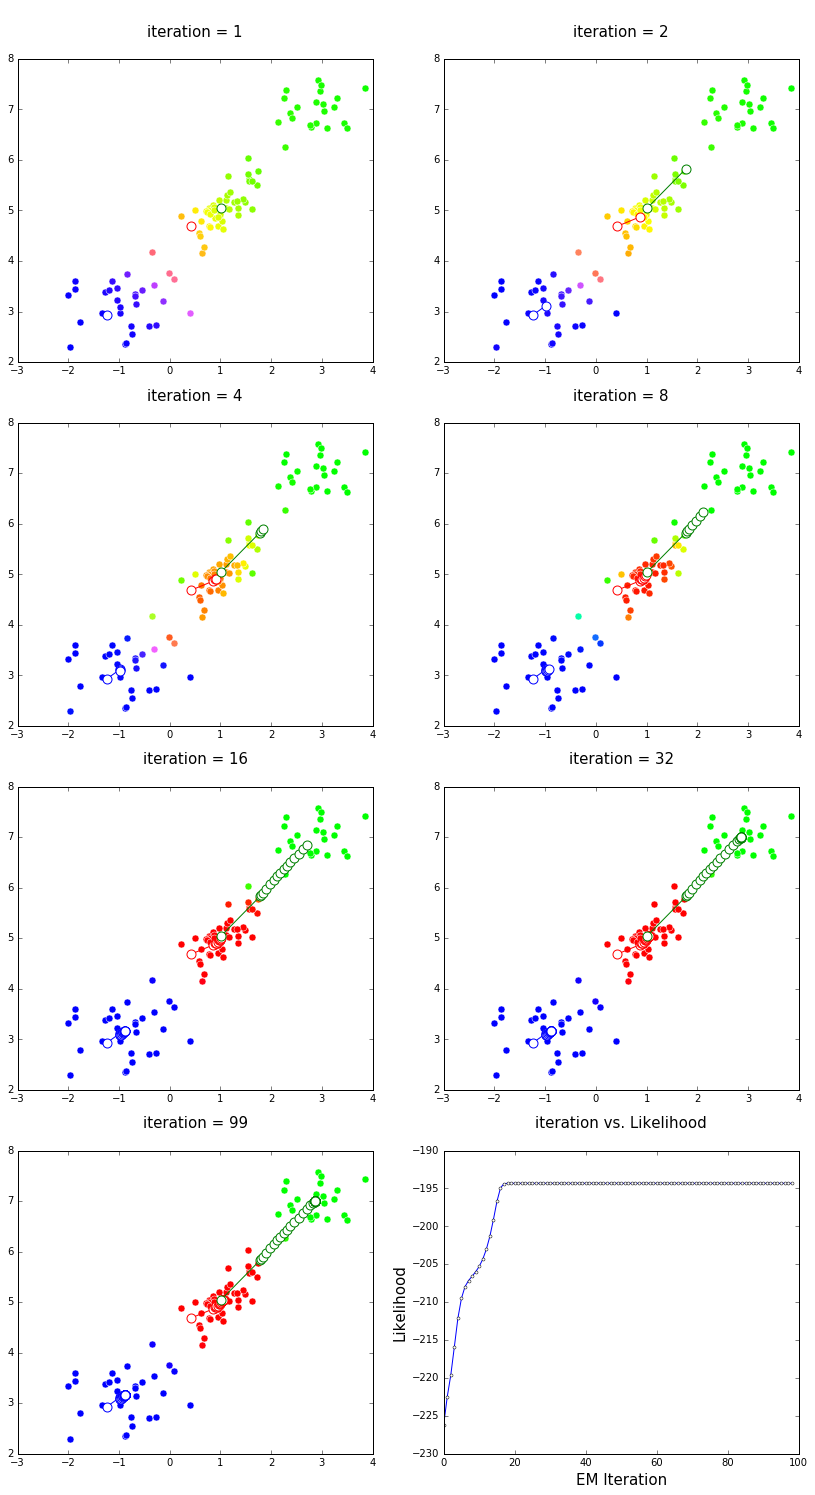

In [23]:
plt.figure(1, figsize=(14, 25), dpi=100)
plotN = 1
for i in range(1, itrEM):
    
    for j in range(N):
        for l in range(k):
            assignment[j, l] = pi[i-1, l] * multivariate_normal.pdf(obs[j, :], mu[i-1, l], sigma[i-1, l])
            
        assignment[j] /= np.sum(assignment[j])
    
    for j in range(k):
        normalize = 0
        mu[i, j] = np.zeros((1,2))
        
        for l in range(N):
            mu[i,j] += assignment[l, j] * obs[l]
            normalize +=  assignment[l, j]
        
        mu[i, j] /= normalize
        
    for j in range(k):
        normalize = 0
        sigma[i, j] = np.zeros((2,2))
        
        for l in range(N):
            sigma[i, j] += assignment[l, j] * np.multiply(np.transpose([obs[l] - mu[i, j]]), obs[l] - mu[i, j])
            normalize += assignment[l, j]
            
        sigma[i, j] /= normalize
   
    for j in range(k):
        for l in range(N):
            pi[i, j] += assignment[l, j]
            
        pi[i, j] /= N
        
    likelihood[i-1] = 0
    
    for j in range(N):        
        sumL = 0
        
        for l in range(k):
            sumL += pi[i, l] * multivariate_normal.pdf(obs[j], mu[i, l], sigma[i, l])
        
        likelihood[i - 1] += np.log(sumL)
        
    if i in showVisualization:
        plt.subplot(4, 2, plotN)
        plt.title(' \niteration = %s\n'%(i), fontsize=15)
        plotN += 1
        
        for j in range(N):
            assignment[j] /= np.max(assignment[j])
            plt.plot(obs[j, 0], obs[j, 1], 'o', markersize = 7, 
                     markerfacecolor = (assignment[j, 0], assignment[j, 1], assignment[j, 2]), markeredgecolor = 'w')
        
        for j in range(k):
            points = np.zeros((i, 2))
            
            for l in range(i):
                points[l] = mu[l, j]
                
            plt.plot(points[:, 0], points[:, 1], color = col[j])
            plt.plot(points[:, 0], points[:, 1], 'wo', markeredgecolor = col[j], markersize = 9, markeredgewidth = 1)
            
plt.subplot(4, 2, 8)
plt.title('iteration vs. Likelihood\n', fontsize=15)
plt.xlabel('EM Iteration', fontsize = 15)
plt.ylabel('Likelihood', fontsize = 15)
plt.plot(likelihood[:])
plt.plot(likelihood[:], 'wo', markersize = 3)


plt.show()